In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
DATA_DIR = './'

In [60]:
signatures_lm_cp = pd.read_csv('signatures_lm_cp.csv', index_col = 0)

In [20]:
sasaki_genes = list(pd.read_csv('sasaki_data.csv', index_col = 0).GeneSymbol)

In [5]:
cp_info=pd.read_table('compoundinfo_beta.txt')

In [26]:
lincs_targets = list(cp_info[['cmap_name', 'target']].dropna().target.unique())
common_genes = set(lincs_targets) & set(sasaki_genes)

In [27]:
common_genes

{'INPP5D', 'PIK3CA', 'PIK3CB', 'PIK3CD', 'PIK3CG', 'PTPMT1'}

In [51]:
targets = cp_info[cp_info.target.isin(list(common_genes))].groupby(['cmap_name', 'target']).count().reset_index()[['cmap_name', 'target']]

In [79]:
common_targets_xpr = ['INPP5D', 'PIK3CD', 'PIK3CA']

In [71]:
signatures_lm_xpr = pd.read_csv('signatures_lm_xpr.csv', index_col = 0)

In [72]:
def map_gene_id_to_gene_symbol(genes_lm,signatures_lm):
    genes = genes_lm.copy()
    signatures = signatures_lm.copy()
    # map gene names of CRISPR signatures
    genes.index = genes.index.astype('int')
    signatures.index = signatures.index.map(genes.to_dict())
    return signatures

In [74]:
gene_info = pd.read_table('geneinfo_beta.txt')
fil = gene_info['feature_space']=='landmark'
genes_lm = gene_info[fil]
genes_lm = genes_lm.set_index('gene_id', drop = True)['gene_symbol']
genes_lm.index = genes_lm.index.astype(str)
signatures_lm_xpr = map_gene_id_to_gene_symbol(genes_lm, signatures_lm_xpr)

In [1]:
# signatures_lm_xpr['PIK3CD']

In [95]:
cps_common_target = targets[targets.target == 'PIK3CD'].cmap_name

In [97]:
cp_df_PIK3CD =  signatures_lm_cp[set(cps_common_target)&set(signatures_lm_cp.columns)]

(array([1., 2., 0., 0., 1., 1., 0., 1., 1., 1.]),
 array([-0.2177879 , -0.18071443, -0.14364097, -0.1065675 , -0.06949404,
        -0.03242057,  0.00465289,  0.04172635,  0.07879982,  0.11587328,
         0.15294675]),
 <a list of 10 Patch objects>)

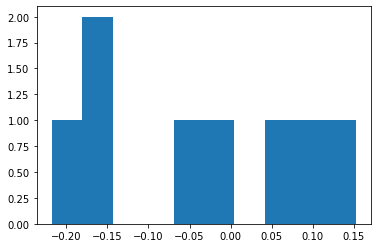

In [120]:
plt.hist(cp_df_PIK3CD.corrwith(signatures_lm_xpr['PIK3CD'].reindex(cp_df_PIK3CD.index)))

(array([2., 1., 0., 1., 2., 2., 2., 0., 0., 2.]),
 array([0.13321739, 0.15185973, 0.17050206, 0.1891444 , 0.20778674,
        0.22642908, 0.24507141, 0.26371375, 0.28235609, 0.30099843,
        0.31964076]),
 <a list of 10 Patch objects>)

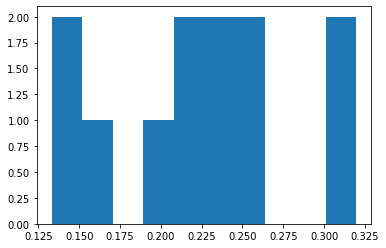

In [122]:
cps_common_target = targets[targets.target == 'PIK3CA'].cmap_name
cp_df_PIK3CA =  signatures_lm_cp[set(cps_common_target)&set(signatures_lm_cp.columns)]
plt.hist(cp_df_PIK3CA.corrwith(signatures_lm_xpr['PIK3CA'].reindex(cp_df_PIK3CD.index)))

# With new level5 cp signatures

In [3]:
signatures_lm_cp = pd.read_csv('signatures_lm_cp_KandP_genenames.csv', index_col = 0)

In [12]:
sasaki_genes = list(pd.read_csv('sasaki_data.csv', index_col = 0).GeneSymbol)
cp_info=pd.read_table('compoundinfo_beta.txt')
cp_info = cp_info[cp_info.target.isin(sasaki_genes)]

In [14]:
signatures_lm_cp.head()

,taselisib,buparlisib,alpelisib,AS-1949490,AS-605240,GDC-0941,GDC-0980,NVP-BEZ235,voxtalisib,myricetin,...,PIK-75,idelalisib,AZD-6482,KU-0060648,wortmannin,TGX-221,PF-05212384,BRD-K75430629,alexidine,quercetin
gene_id,,,,,,,,,,,,,,,,,,,,,
AARS,-1.256834,-0.808877,-0.182400,0.411534,-0.013432,-0.454074,-1.787996,-1.295207,-1.135059,-0.476213,...,-1.632145,0.001529,-0.615453,-0.857632,-0.767112,-0.059405,-1.603846,-0.246469,3.222514,0.597731
ABCF1,0.035125,0.097803,-0.218374,0.077573,-0.025060,0.036456,-0.001898,-0.308488,0.217407,-0.300563,...,0.606971,0.341929,-0.017504,0.262821,-0.019700,-0.085136,-0.314791,-0.127939,-0.130272,0.432374
ABL1,0.511165,0.228419,-0.051543,1.054311,-0.095123,0.131589,-0.055688,0.552883,-0.089392,-0.205829,...,-3.089574,-0.070966,-0.011384,-0.776805,0.491740,-0.093283,0.024405,0.253486,0.210659,0.540849
ACAA1,-0.204570,0.055112,-0.159272,0.074344,0.016825,-0.009267,-0.117765,-0.154577,-0.039770,0.258132,...,1.290873,-0.173959,-0.002016,1.238860,0.062920,0.293668,-0.201616,0.864983,-0.545269,0.094450
ACAT2,-1.478355,-1.442871,-0.445698,-0.209043,-0.265942,-0.659891,-1.590228,-2.833766,-1.834406,0.175886,...,1.606426,-0.698885,-0.345652,0.414025,-0.663553,-0.142828,-2.215269,-0.613098,-0.726398,-1.471106


### correlation with xpr signatures

In [17]:
signatures_lm_xpr = pd.read_csv('signatures_lm_xpr_genenames.csv', index_col = 0)

In [24]:
common_genes = signatures_lm_xpr.columns[signatures_lm_xpr.columns.isin(cp_info.target.unique())]

In [74]:
correlations = pd.DataFrame(columns = ['Gene', 'Compound', 'Correlation'])
for gene in common_genes:
    cpds = cp_info[cp_info.target == gene].cmap_name.unique()
    
    assert(all(signatures_lm_cp.index == signatures_lm_xpr.index))
    corr = pd.DataFrame(signatures_lm_cp.loc[:, cpds].corrwith(signatures_lm_xpr.loc[:, gene], method = 'spearman'),
                        columns = ['Correlation'])
    
    corr = corr.reset_index()
    corr = corr.rename(columns = {'index':'Compound'})
    corr['Gene'] = gene
    correlations = correlations.append(corr)
correlations = correlations.reset_index(drop=True)

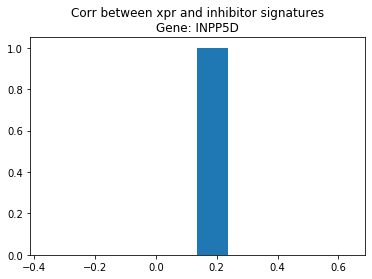

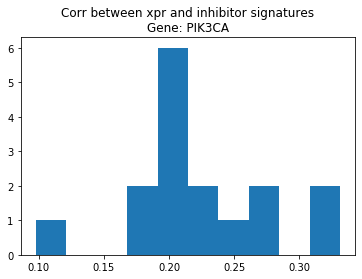

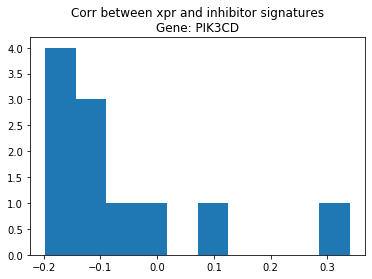

In [75]:
for i in correlations.Gene.unique():
    plt.hist(correlations[correlations['Gene'] == i].Correlation)
    plt.title('Corr between xpr and inhibitor signatures\nGene: '+i)
    plt.show()

In [76]:
correlations[correlations['Gene'] == 'PIK3CD']

,Gene,Compound,Correlation
17,PIK3CD,NVP-BEZ235,-0.092447
18,PIK3CD,LY-294002,-0.193860
19,PIK3CD,PI-103,-0.134989
20,PIK3CD,SB-2343,-0.186098
21,PIK3CD,AZD-6482,-0.167277
22,PIK3CD,BRD-K75430629,0.339880
23,PIK3CD,copanlisib,-0.095638
24,PIK3CD,idelalisib,0.122942
25,PIK3CD,IPI-145,0.008518
26,PIK3CD,KU-0060648,-0.197162


In [88]:
signatures_lm_xpr.loc['PIK3C2B', 'PIK3CD']

-0.1067461106952961

In [83]:
print([s for s in signatures_lm_xpr.index if 'PIK3' in s])

['PIK3C2B', 'PIK3C3', 'PIK3CA', 'PIK3R3', 'PIK3R4']


In [97]:
sign_cell = pd.read_csv(DATA_DIR+'cell_signatures/signatures_lm_xpr_A375.csv', index_col =0)

In [99]:
sign_cell.loc['PIK3C2B', 'PIK3CD']

1.303253412246704